In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.e

In [22]:
data=pd.read_csv("train_ctrUa4K.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
data['Dependents']=data.Dependents.map({'0':'zero','1':'one','2':'two','3+':'three'})
data['Credit_History']=data.Credit_History.map({0:'zero',1:'one'})
data['Loan_Amount_Term']=data.Loan_Amount_Term.map({12:'one',36:'three',60:'five',84:'seven',120:'ten',180:'fifteen',240:'twenty',300:'twentyfive',360:'thirty',480:'forty'})

In [24]:
for column in ('Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term'):
    data[column].fillna(data[column].mode()[0],inplace=True)
for column in ('LoanAmount','CoapplicantIncome','ApplicantIncome'):
    data[column].fillna(data[column].median(),inplace=True)

In [25]:
data['Education'] = data['Education'].str.replace(' ','_')

In [26]:
data['Loan_Status']=data.Loan_Status.map({'Y':1,'N':0})
Y=data['Loan_Status'].values
data.drop(['Loan_Status'],axis=1,inplace=True)
X=data[data.iloc[:,1:13].columns]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
print("="*50,"Gender","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer.transform(X_test['Gender'].values)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Married","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Married'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Married_ohe = vectorizer.transform(X_train['Married'].values)
X_test_Married_ohe = vectorizer.transform(X_test['Married'].values)

print("After vectorizations")
print(X_train_Married_ohe.shape, y_train.shape)
print(X_test_Married_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Dependents","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Dependents'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Dependents_ohe = vectorizer.transform(X_train['Dependents'].values)
X_test_Dependents_ohe = vectorizer.transform(X_test['Dependents'].values)

print("After vectorizations")
print(X_train_Dependents_ohe.shape, y_train.shape)
print(X_test_Dependents_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Education","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Education'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Education_ohe = vectorizer.transform(X_train['Education'].values)
X_test_Education_ohe = vectorizer.transform(X_test['Education'].values)

print("After vectorizations")
print(X_train_Education_ohe.shape, y_train.shape)
print(X_test_Education_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


print("="*50,"Self_Employed","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Self_Employed'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Self_Employed_ohe = vectorizer.transform(X_train['Self_Employed'].values)
X_test_Self_Employed_ohe = vectorizer.transform(X_test['Self_Employed'].values)

print("After vectorizations")
print(X_train_Self_Employed_ohe.shape, y_train.shape)
print(X_test_Self_Employed_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Property_Area","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Property_Area'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Property_Area_ohe = vectorizer.transform(X_train['Property_Area'].values)
X_test_Property_Area_ohe = vectorizer.transform(X_test['Property_Area'].values)

print("After vectorizations")
print(X_train_Property_Area_ohe.shape, y_train.shape)
print(X_test_Property_Area_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Loan_Amount_Term","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Loan_Amount_Term'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Loan_Amount_Term_ohe = vectorizer.transform(X_train['Loan_Amount_Term'].values)
X_test_Loan_Amount_Term_ohe = vectorizer.transform(X_test['Loan_Amount_Term'].values)

print("After vectorizations")
print(X_train_Loan_Amount_Term_ohe.shape, y_train.shape)
print(X_test_Loan_Amount_Term_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()

print("="*50,"Credit_History","="*50)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Credit_History'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Credit_History_ohe = vectorizer.transform(X_train['Credit_History'].values)
X_test_Credit_History_ohe = vectorizer.transform(X_test['Credit_History'].values)

print("After vectorizations")
print(X_train_Credit_History_ohe.shape, y_train.shape)
print(X_test_Credit_History_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print()


================================================== Gender ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['female', 'male']

================================================== Married ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Dependents ==================================================
After vectorizations
(411, 4) (411,)
(203, 4) (203,)
['one', 'three', 'two', 'zero']

================================================== Education ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['graduate', 'not_graduate']

================================================== Self_Employed ==================================================
After vectorizations
(411, 2) (411,)
(203, 2) (203,)
['no', 'yes']

================================================== Property_Ar

In [28]:
from sklearn.preprocessing import Normalizer
print("="*50,"LoanAmount","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = normalizer.transform(X_train['LoanAmount'].values.reshape(1,-1))
X_test_LoanAmount_norm = normalizer.transform(X_test['LoanAmount'].values.reshape(1,-1))

X_train_LoanAmount_norm = X_train_LoanAmount_norm.reshape(-1,1)
X_test_LoanAmount_norm = X_test_LoanAmount_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_LoanAmount_norm.shape, y_train.shape)
print(X_test_LoanAmount_norm.shape, y_test.shape)
print()

print("="*50,"ApplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = normalizer.transform(X_train['ApplicantIncome'].values.reshape(1,-1))
X_test_ApplicantIncome_norm = normalizer.transform(X_test['ApplicantIncome'].values.reshape(1,-1))

X_train_ApplicantIncome_norm = X_train_ApplicantIncome_norm.reshape(-1,1)
X_test_ApplicantIncome_norm = X_test_ApplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_ApplicantIncome_norm.shape, y_train.shape)
print(X_test_ApplicantIncome_norm.shape, y_test.shape)
print()

print("="*50,"CoapplicantIncome","="*50)
normalizer = Normalizer()
normalizer.fit(X_train['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = normalizer.transform(X_train['CoapplicantIncome'].values.reshape(1,-1))
X_test_CoapplicantIncome_norm = normalizer.transform(X_test['CoapplicantIncome'].values.reshape(1,-1))

X_train_CoapplicantIncome_norm = X_train_CoapplicantIncome_norm.reshape(-1,1)
X_test_CoapplicantIncome_norm = X_test_CoapplicantIncome_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_CoapplicantIncome_norm.shape, y_train.shape)
print(X_test_CoapplicantIncome_norm.shape, y_test.shape)

================================================== LoanAmount ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== ApplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)

================================================== CoapplicantIncome ==================================================
After vectorizations
(411, 1) (411,)
(203, 1) (203,)


In [29]:
from scipy.sparse import hstack
X_tr = hstack((X_train_Gender_ohe, X_train_Married_ohe, X_train_Dependents_ohe,X_train_Education_ohe,X_train_Self_Employed_ohe,X_train_Property_Area_ohe,X_train_Loan_Amount_Term_ohe,X_train_Credit_History_ohe,X_train_LoanAmount_norm,X_train_ApplicantIncome_norm,X_train_CoapplicantIncome_norm)).tocsr()
X_te = hstack((X_test_Gender_ohe, X_test_Married_ohe, X_test_Dependents_ohe,X_test_Education_ohe,X_test_Self_Employed_ohe,X_test_Property_Area_ohe,X_test_Loan_Amount_Term_ohe,X_test_Credit_History_ohe,X_test_LoanAmount_norm,X_test_ApplicantIncome_norm,X_test_CoapplicantIncome_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*125)

Final Data matrix
(411, 29) (411,)
(203, 29) (203,)


# SVM Model

In [42]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
grid_search_svm.fit(X_tr, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
best_param=grid_search_svm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'C': 1, 'gamma': 0.01}


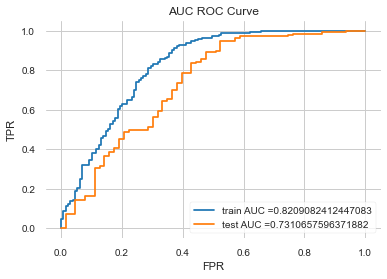

In [44]:
from sklearn.metrics import roc_curve, auc

SVM_model= SVC(kernel='rbf',C=best_param['C'],gamma=best_param['gamma'],probability=True)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
SVM_model.fit(X_tr, y_train)


y_train_pred = SVM_model.predict_proba(X_tr)    
y_test_pred = SVM_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [45]:
y_test_predict=SVM_model.predict(X_te)
print("Recall for  SVM model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for SVM model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for SVM model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for SVM model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for SVM model:",metrics.log_loss(y_test,y_test_predict))

Recall for  SVM model: 0.9714285714285714
Precision for SVM model: 0.7861271676300579
Accuracy for SVM model: 0.7980295566502463
F-score for SVM model: 0.8690095846645367
Log-loss for SVM model: 6.975957720671209


# Decision Tree Model

In [49]:
min_sample_leaf_val=[1,2,3,4,5,6,7,8,9,10]
criterion_val=['entropy','gini']
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[10,100,150,200,250]
param_grid = {'max_depth':max_depth,'criterion':criterion_val,'min_samples_leaf':min_sample_leaf_val,'min_samples_split':min_samples_split}
DT_model=DecisionTreeClassifier()
clf = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=10)
clf.fit(X_tr,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

In [50]:
best_param=clf.best_params_
print("Best Hyperparameter: ",best_param)
max_depth_DT=best_param['max_depth']
min_samples_split_DT=best_param['min_samples_split']
min_samples_leaf_DT=best_param['min_samples_leaf']
criterion_DT=best_param['criterion']

Best Hyperparameter:  {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 10}


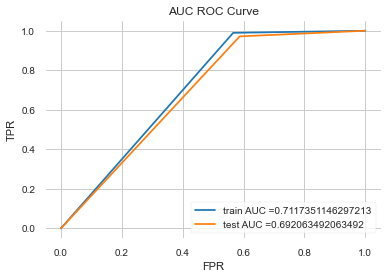

In [51]:
from sklearn.metrics import roc_curve, auc


DT_model= DecisionTreeClassifier(max_depth=max_depth_DT,min_samples_leaf=min_samples_leaf_DT,criterion=criterion_DT,min_samples_split=min_samples_split_DT)
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
DT_model.fit(X_tr, y_train)


y_train_pred = DT_model.predict_proba(X_tr)    
y_test_pred = DT_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [52]:
DT_pred=DT_model.predict(X_te)
print("Recall for decision tree model:",metrics.recall_score(y_test,DT_pred))
print("Precision for decision tree model:",metrics.precision_score(y_test,DT_pred))
print("Accuracy for decision tree model:",metrics.accuracy_score(y_test,DT_pred))
print("F-score for decision tree model:",metrics.f1_score(y_test,DT_pred))
print("Log-loss for decision tree model:",metrics.log_loss(y_test,DT_pred))

Recall for decision tree model: 0.9714285714285714
Precision for decision tree model: 0.7861271676300579
Accuracy for decision tree model: 0.7980295566502463
F-score for decision tree model: 0.8690095846645367
Log-loss for decision tree model: 6.975957720671209


# Random Forest Model

In [53]:
n_estimator_val = [100,150,300,500,1000]
n_sample_leaf_val = [1,2,3,4,5,6]
max_feature_val=["auto","sqrt",None,0.9]
param_grid = {'n_estimators': n_estimator_val, 'min_samples_leaf' : n_sample_leaf_val,'max_features':max_feature_val}
RF_model=RandomForestClassifier()
grid_search_RF = GridSearchCV(estimator = RF_model,param_grid=param_grid, cv=3,scoring='roc_auc',return_train_score=True)
grid_search_RF.fit(X_tr, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
best_param=grid_search_RF.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_features': 0.9, 'min_samples_leaf': 1, 'n_estimators': 100}


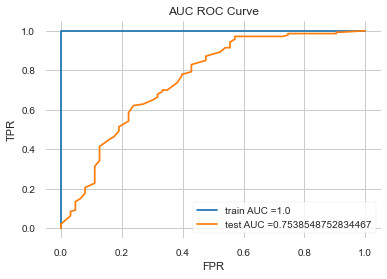

In [55]:
from sklearn.metrics import roc_curve, auc

RF_model= RandomForestClassifier(n_estimators=best_param['n_estimators'],min_samples_leaf=best_param['min_samples_leaf'],max_features=best_param['max_features'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
RF_model.fit(X_tr, y_train)


y_train_pred = RF_model.predict_proba(X_tr)    
y_test_pred = RF_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [56]:
y_test_predict=RF_model.predict(X_te)
print("Recall for Random Forest model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Random Forest model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Random Forest model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Random Forest model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Random Forest model:",metrics.log_loss(y_test,y_test_predict))

Recall for Random Forest model: 0.9142857142857143
Precision for Random Forest model: 0.7852760736196319
Accuracy for Random Forest model: 0.7684729064039408
F-score for Random Forest model: 0.8448844884488449
Log-loss for Random Forest model: 7.99680037670374


In [70]:
importances = RF_model.feature_importances_ 
print(importances)#array with importances of each feature
ind = np.arange(0, X_tr.shape[1]) #create an index array, with the number of features
#only keep features whose importance is greater than 0
X_tr_features_to_keep_RF = X_tr[:,ind[importances>0.01]] 
X_te_features_to_keep_RF = X_te[:,ind[importances>0.01]]
X_tr_features_to_keep

[6.11558211e-03 8.10002697e-03 1.21873618e-02 1.61117177e-02
 1.67631068e-02 9.61524140e-03 8.59514001e-03 1.62463866e-02
 1.11175574e-02 1.15724075e-02 8.02422296e-03 8.00904602e-03
 1.56053621e-02 1.68550212e-02 1.25476234e-02 7.66237493e-03
 7.59277363e-05 1.66848893e-02 0.00000000e+00 0.00000000e+00
 1.07431061e-02 9.51639919e-03 1.02266421e-03 2.88694339e-03
 1.64682429e-01 1.54390009e-01 1.53296469e-01 2.07649545e-01
 9.39234386e-02]


<411x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3363 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [65]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
classifier = GridSearchCV(LogisticRegression(), param_grid,cv=10,scoring='roc_auc',return_train_score=True)
classifier.fit(X_tr, y_train)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

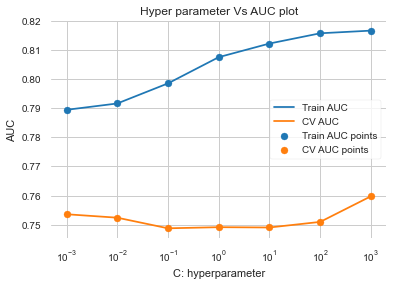

In [66]:
results_tf = pd.DataFrame.from_dict(classifier.cv_results_)
results_tf = results_tf.sort_values(['param_C'])
train_auc= results_tf['mean_train_score']
train_auc_std= results_tf['std_train_score']
cv_auc = results_tf['mean_test_score'] 
cv_auc_std= results_tf['std_test_score']
A =  results_tf['param_C']
plt.plot(A, train_auc, label='Train AUC')


plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [67]:
best_param=classifier.best_params_
print("Best Hyperparameter: ",best_param)
p_C=best_param['C']

Best Hyperparameter:  {'C': 1000}


C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


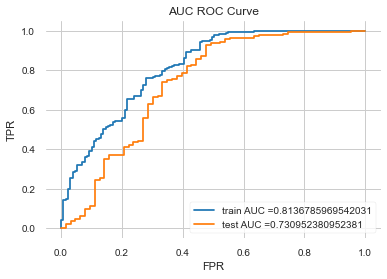

In [68]:
from sklearn.metrics import roc_curve, auc


Log_model = LogisticRegression(C=p_C)
Log_model.fit(X_tr, y_train)


y_train_pred = Log_model.predict_proba(X_tr)    
y_test_pred = Log_model.predict_proba(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [69]:
#y_test_predict=predict_with_best_t(y_test_pred[:,1], best_t)
y_test_predict=Log_model.predict(X_te)
print("Recall for logistic regression model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for logistic regression model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for logistic regression model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for logistic regression model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for logistic regression model:",metrics.log_loss(y_test,y_test_predict))

Recall for logistic regression model: 0.9642857142857143
Precision for logistic regression model: 0.7848837209302325
Accuracy for logistic regression model: 0.7931034482758621
F-score for logistic regression model: 0.8653846153846154
Log-loss for logistic regression model: 7.146099476311163


In [80]:
importances = Log_model.coef_[0] #array with importances of each feature
ind = np.arange(0, X_tr.shape[1])
print(importances)#create an index array, with the number of features
#only keep features whose importance is greater than 0
X_tr_features_to_keep_LR = X_tr[:,ind[importances > 0]] 
X_te_features_to_keep_LR = X_te[:,ind[importances > 0]]
X_tr_features_to_keep_LR

[  0.11915832  -0.1202853   -0.25435227   0.25322529  -0.32903509
   0.08595314   0.27785642  -0.03590145   0.21377744  -0.21490442
  -0.05477797   0.05365099  -0.39219791   0.57019302  -0.1791221
  -0.4507412    2.76145422  -2.27900264   3.1904391    2.89609337
  -0.79839609 -10.29868749   5.99417623  -1.01646248   2.22446858
  -2.22559556 -13.32332805  11.58618145   3.93353186]


<411x14 sparse matrix of type '<class 'numpy.float64'>'
	with 1963 stored elements in Compressed Sparse Row format>

# Gradient Boosting with RF features

In [71]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(learning_rate= 0.01), param_grid, cv=5)
grid_search_gbm.fit(X_tr_features_to_keep_RF,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...e=None,
          

In [72]:
best_param=grid_search_gbm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_depth': 1, 'max_features': 1, 'n_estimators': 500}


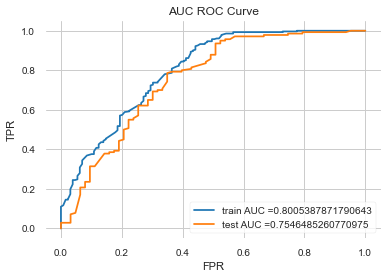

In [73]:
from sklearn.metrics import roc_curve, auc

GRAD_model= GradientBoostingClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
GRAD_model.fit(X_tr_features_to_keep_RF, y_train)


y_train_pred = GRAD_model.predict_proba(X_tr_features_to_keep_RF)    
y_test_pred = GRAD_model.predict_proba(X_te_features_to_keep_RF)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [74]:
y_test_predict=GRAD_model.predict(X_te_features_to_keep_RF)
print("Recall for  Gradient model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Gradient model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Gradient model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Gradient model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Gradient model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Gradient model: 0.9714285714285714
Precision for Gradient model: 0.7861271676300579
Accuracy for Gradient model: 0.7980295566502463
F-score for Gradient model: 0.8690095846645367
Log-loss for Gradient model: 6.975957720671209


# XGBoost with RF Features

In [75]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
gammas = [0.001, 0.01, 0.1, 1]
learning_rate_val=[0.01,0.1,1,10,100]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,'gamma':gammas}
grid_search_xg = GridSearchCV(XGBClassifier(learning_rate=0.01), param_grid, cv=3)
grid_search_xg.fit(X_tr_features_to_keep_RF,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [76]:
best_param=grid_search_xg.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'gamma': 0.001, 'max_depth': 1, 'max_features': 1, 'n_estimators': 150}


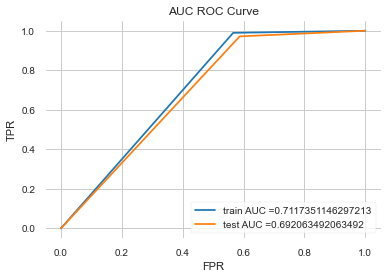

In [77]:
from sklearn.metrics import roc_curve, auc

XGB_model= XGBClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'],gammas=best_param['gamma'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
XGB_model.fit(X_tr_features_to_keep_RF, y_train)


y_train_pred = XGB_model.predict_proba(X_tr_features_to_keep_RF)    
y_test_pred = XGB_model.predict_proba(X_te_features_to_keep_RF)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [78]:
y_test_predict=XGB_model.predict(X_te_features_to_keep_RF)
print("Recall for  XGBoost model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for XGBoost model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for XGBoost model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for XGBoost model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for XGBoost model:",metrics.log_loss(y_test,y_test_predict))

Recall for  XGBoost model: 0.9714285714285714
Precision for XGBoost model: 0.7861271676300579
Accuracy for XGBoost model: 0.7980295566502463
F-score for XGBoost model: 0.8690095846645367
Log-loss for XGBoost model: 6.975957720671209


# Gradient Boosting with LR Features

In [81]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth}
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(learning_rate= 0.01), param_grid, cv=5)
grid_search_gbm.fit(X_tr_features_to_keep_LR,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...e=None,
          

In [82]:
best_param=grid_search_gbm.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'max_depth': 1, 'max_features': 1, 'n_estimators': 1000}


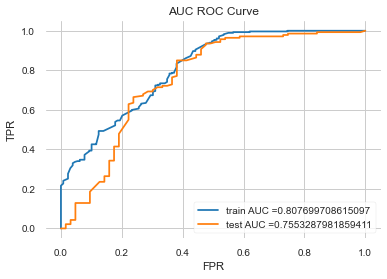

In [83]:
from sklearn.metrics import roc_curve, auc

GRAD_model= GradientBoostingClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
GRAD_model.fit(X_tr_features_to_keep_LR, y_train)


y_train_pred = GRAD_model.predict_proba(X_tr_features_to_keep_LR)    
y_test_pred = GRAD_model.predict_proba(X_te_features_to_keep_LR)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [84]:
y_test_predict=GRAD_model.predict(X_te_features_to_keep_LR)
print("Recall for  Gradient model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for Gradient model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for Gradient model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for Gradient model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for Gradient model:",metrics.log_loss(y_test,y_test_predict))

Recall for  Gradient model: 0.9714285714285714
Precision for Gradient model: 0.7861271676300579
Accuracy for Gradient model: 0.7980295566502463
F-score for Gradient model: 0.8690095846645367
Log-loss for Gradient model: 6.975957720671209


# XGBoost with LR Features

In [85]:
n_estimators=[150,200,500,1000,1500,2000]
max_features=[1,2,3]
max_depth=[1,2,3,4,5,6,7,8,9,10]
gammas = [0.001, 0.01, 0.1, 1]
learning_rate_val=[0.01,0.1,1,10,100]
param_grid = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,'gamma':gammas}
grid_search_xg = GridSearchCV(XGBClassifier(learning_rate=0.01), param_grid, cv=3)
grid_search_xg.fit(X_tr_features_to_keep_LR,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [86]:
best_param=grid_search_xg.best_params_
print("Best Hyperparameter: ",best_param)

Best Hyperparameter:  {'gamma': 0.001, 'max_depth': 1, 'max_features': 1, 'n_estimators': 150}


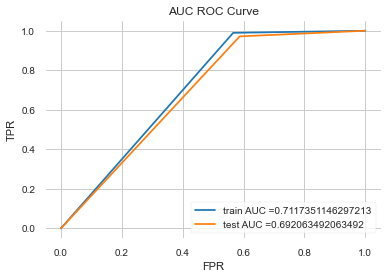

In [87]:
from sklearn.metrics import roc_curve, auc

XGB_model= XGBClassifier(learning_rate=0.01,n_estimators=best_param['n_estimators'],max_features=best_param['max_features'],max_depth=best_param['max_depth'],gammas=best_param['gamma'])
#DT = DecisionTreeClassifier(max_depth=50,min_samples_split=5)
XGB_model.fit(X_tr_features_to_keep_LR, y_train)


y_train_pred = XGB_model.predict_proba(X_tr_features_to_keep_LR)    
y_test_pred = XGB_model.predict_proba(X_te_features_to_keep_LR)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC ROC Curve")
plt.grid()
plt.show()

In [88]:
y_test_predict=XGB_model.predict(X_te_features_to_keep_LR)
print("Recall for  XGBoost model:",metrics.recall_score(y_test,y_test_predict))
print("Precision for XGBoost model:",metrics.precision_score(y_test,y_test_predict))
print("Accuracy for XGBoost model:",metrics.accuracy_score(y_test,y_test_predict))
print("F-score for XGBoost model:",metrics.f1_score(y_test,y_test_predict))
print("Log-loss for XGBoost model:",metrics.log_loss(y_test,y_test_predict))

Recall for  XGBoost model: 0.9714285714285714
Precision for XGBoost model: 0.7861271676300579
Accuracy for XGBoost model: 0.7980295566502463
F-score for XGBoost model: 0.8690095846645367
Log-loss for XGBoost model: 6.975957720671209
